@[toc](目录)

**Pytorch一般有以下几个流程**


### 1.数据读取

### 2.数据处理

### 3.搭建网络

### 4.模型训练

### 5.模型上线


主要包括以上几个阶段，每个阶段又可以细分，后面再说


### 1.数据读取
CIFAR-10 是由 Hinton 的学生 Alex Krizhevsky 和 Ilya Sutskever 整理的一个用于识别普适物体的小型数据集。一共包含 10 个类别的 RGB 彩色图 片：飞机（ arplane ）、汽车（ automobile ）、鸟类（ bird ）、猫（ cat ）、鹿（ deer ）、狗（ dog ）、蛙类（ frog ）、马（ horse ）、船（ ship ）和卡车（ truck ）。图片的尺寸为 32×32 ，数据集中一共有 50000 张训练圄片和 10000 张测试图片。 

与 MNIST 数据集中目比， CIFAR-10 具有以下不同点：

    • CIFAR-10 是 3 通道的彩色 RGB 图像，而 MNIST 是灰度图像。
    • CIFAR-10 的图片尺寸为 32×32， 而 MNIST 的图片尺寸为 28×28，比 MNIST 稍大。
    • 相比于手写字符， CIFAR-10 含有的是现实世界中真实的物体，不仅噪声很大，而且物体的比例、 特征都不尽相同，这为识别带来很大困难。

首先使用`torchvision`加载和归一化我们的训练数据和测试数据。

    a、`torchvision`这个东西，实现了常用的一些深度学习的相关的图像数据的加载功能，比如cifar10、Imagenet、Mnist等等的，保存在`torchvision.datasets`模块中。
    
    b、同时，也封装了一些处理数据的方法。保存在`torchvision.transforms`模块中
    
    c、还封装了一些模型和工具封装在相应模型中,比如`torchvision.models`当中就包含了AlexNet，VGG，ResNet，SqueezeNet等模型。

In [1]:
#首先导入torch，torchvision模块

import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

**由于torchvision的datasets的输出是[0,1]的PILImage，所以我们先先归一化为[-1,1]的Tensor**

首先定义了一个变换transform，利用的是上面提到的transforms模块中的Compose( )把多个变换组合在一起，可以看到这里面组合了ToTensor和Normalize这两个变换

`transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))`前面的（0.5，0.5，0.5） 是 R G B 三个通道上的均值， 后面(0.5, 0.5, 0.5)是三个通道的标准差，注意通道顺序是 R G B ，用过opencv的同学应该知道openCV读出来的图像是 BRG顺序。这两个tuple数据是用来对RGB 图像做归一化的，如其名称 Normalize 所示这里都取0.5只是一个近似的操作，实际上其均值和方差并不是这么多，但是就这个示例而言 影响可不计。精确值是通过分别计算R,G,B三个通道的数据算出来的。


In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 

In [3]:
# datasets.CIFAR10( )也是封装好了的，就在我前面提到的torchvision.datasets块中
trainset = datasets.CIFAR10(root='D:/CIFAR-10', train=True,download=True, transform=transform)

Files already downloaded and verified


 `trainloader`其实是一个比较重要的东西，我们后面就是通过`trainloader`把数据传入网络，当然这里的`trainloader`其实是个变量名，可以随便取，重点是他是由后面的`torch.utils.data.DataLoader()`定义的，这个东西来源于`torch.utils.data`模块

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,shuffle=True, num_workers=2)

In [5]:
# 对于测试集的操作和训练集一样，我就不赘述了
testset = torchvision.datasets.CIFAR10(root='D:/CIFAR-10', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,shuffle=False, num_workers=2)
    # 类别信息也是需要我们给定的
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [6]:
trainset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
trainset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

### 2. 查看数据（格式，大小，形状）

In [8]:
trainset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [9]:
trainset.data.shape#50000是图片数量，32x32是图片大小，3是通道数量RGB

(50000, 32, 32, 3)

In [10]:
trainset.data[10000][31][31][2]

168

In [11]:
#查看数据类型
print(type(trainset.data))
print(type(trainset))

<class 'numpy.ndarray'>
<class 'torchvision.datasets.cifar.CIFAR10'>


In [12]:
trainset[10000][0][2][31][31]#10000为图片数量，0表示取前面的数据，2表示通道数RGB，32*32表示图片大小

tensor(0.3176)

### 总结：
    
    `trainset.data.shape`是标准的numpy.ndarray类型，其中50000是图片数量，32x32是图片大小，3是通道数量RGB；
    `trainset`是标准的？？类型，其中50000为图片数量，0表示取前面的数据，2表示3通道数RGB，32*32表示图片大小
    
 ### 3. 查看图片

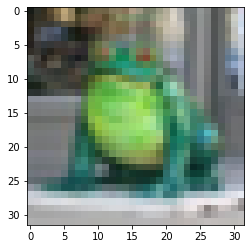

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(trainset.data[19])

### np.ndarray转为torch.Tensor

在深度学习中，原始图像需要转换为深度学习框架自定义的数据格式，在pytorch中，需要转为`torch.Tensor`。
pytorch提供了`torch.Tensor` 与`numpy.ndarray`转换为接口：

方法名|作用
--|--
`torch.from_numpy(xxx)`|`numpy.ndarray`转为torch.Tensor
`tensor1.numpy()`|获取tensor1对象的numpy格式数据

`torch.Tensor` 高维矩阵的表示： N x C x H x W

`numpy.ndarray` 高维矩阵的表示：N x H x W x C

因此在两者转换的时候需要使用`numpy.transpose( )` 方法 。


In [14]:
# numpy image: H x W x C
# torch image: C x H x W
# np.transpose( xxx,  (2, 0, 1))   # 将 H x W x C 转化为 C x H x W
tensor_skimage = torch.from_numpy(np.transpose(trainset.data[19], (2, 0, 1)))
tensor_skimage.size()

torch.Size([3, 32, 32])

### torch.Tensor转numpy.ndarray

In [15]:
# np.transpose( xxx,  (2, 0, 1))   # 将 C x H x W 转化为 H x W x C
img_skimage_2 = np.transpose(trainset[19][0].numpy(), (1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


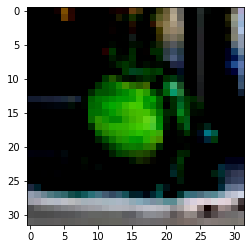

In [16]:
plt.imshow(img_skimage_2)

### 4.定义网络（DenseNet）

前面ResNet通过前层与后层的“短路连接”（Shortcuts），加强了前后层之间的信息流通，在一定程度上缓解了梯度消失现象，从而**可以将神经网络搭建得很深**。更进一步，DenseNet最大化了这种前后层信息交流，通过建立**前面所有层与后面层的密集连接**，实现了特征在通道维度上的复用，使其可以在参数与计算量更少的情况下实现比ResNet更优的性能。

DenseNet的网络架构如下图所示，网络由多个Dense Block与中间的卷积池化组成，核心就在Dense Block中。Dense Block中的黑点代表一个卷积层，其中的多条黑线代表数据的流动，每一层的输入由前面的所有卷积层的输出组成。注意这里使用了通道拼接（Concatnate）操作，而非ResNet的逐元素相加操作。

<img src="https://img2018.cnblogs.com/blog/1503464/201812/1503464-20181227214522263-1720636690.png" alt="结构" />



    
 具体的Block实现细节如下图所示，每一个Block由若干个Bottleneck的卷积层组成，对应上面图中的黑点。Bottleneck由BN、ReLU、1×1卷积、BN、ReLU、3×3卷积的顺序构成，也被称为DenseNet-B结构。其中1x1 Conv得到 4k 个特征图它起到的作用是降低特征数量，从而提升计算效率。
 
 <img src="https://img-blog.csdnimg.cn/20200415174601573.png" alt="DenseNet的Block结构" />


关于Block，有以下4个细节需要注意：

    1.每一个Bottleneck输出的特征通道数是相同的，例如这里的32。同时可以看到，经过Concatnate操作后的通道数是按32的增长量增加的，因此这个32也被称为GrowthRate。
    
    2.这里1×1卷积的作用是固定输出通道数，达到降维的作用。当几十个Bottleneck相连接时，Concatnate后的通道数会增加到上千，如果不增加1×1的卷积来降维，后续3×3卷积所需的参数量会急剧增加。1×1卷积的通道数通常是GrowthRate的4倍。
    
    3.上图中的特征传递方式是直接将前面所有层的特征Concatnate后传到下一层，这种方式与具体代码实现的方式是一致的。
    
    4. Block采用了激活函数在前、卷积层在后的顺序，这与一般的网络上是不同的。
    
    
DenseNet的结构有如下两个特性：

    1.神经网络一般需要使用池化等操作缩小特征图尺寸来提取语义特征，而Dense Block需要保持每一个Block内的特征图尺寸一致来直接进行Concatnate操作，因此DenseNet被分成了多个Block。Block的数量一般为4。
    
    2.两个相邻的Dense Block之间的部分被称为Transition层，对于Transition层，它主要是连接两个相邻的DenseBlock，并且降低特征图大小。具体包括BN、ReLU、1×1卷积（Conv）、2×2平均池化操作。1×1卷积的作用是降维，起到压缩模型的作用，而平均池化则是降低特征图的尺寸。
    
    3.Transition层可以起到压缩模型的作用。假定Transition的上接DenseBlock得到的特征图channels数为m ，Transition层可以产生θm个特征（通过卷积层），其中0 <θ≤1是压缩系数（compression rate）。当 θ=1时，特征个数经过Transition层没有变化，即无压缩，而当压缩系数小于1时，这种结构称为DenseNet-C，原论文中使用θ≤0.5 。对于使用bottleneck层的DenseBlock结构和压缩系数小于1的Transition组合结构称为DenseNet-BC。
    
    
    
**数据集的不同**

DenseNet共在三个图像分类数据集（CIFAR，SVHN和ImageNet）上进行测试。对于CIFAR，SVHN两个数据集，其输入图片大小为 32x32，所使用的DenseNet在进入第一个DenseBlock之前，首先进行进行一次3x3卷积（stride=1），每个DenseBlock里面的层数相同。最后的DenseBlock之后是一个global AvgPooling层，然后送入一个softmax分类器。注意，在DenseNet中，所有的3x3卷积均采用padding=1的方式以保证特征图大小维持不变。
 
 <img src="https://img-blog.csdnimg.cn/20200416142708458.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQwMTk1MzYw,size_16,color_FFFFFF,t_70" alt="CIFAR，SVHN结构" />
 
<h4><center>注意：这是我根绝自己的理解画的图（原文中没有），如有错误还望指正</center></h4>
 
 
 对于ImageNet数据集，图片输入大小为224x224，网络结构采用包含4个DenseBlock的DenseNet-BC，其首先是一个stride=2的7x7卷积层，然后是一个stride=2的3x3 MaxPooling层，后面才进入DenseBlock。
 
 <img src="https://img-blog.csdnimg.cn/20200416142730236.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQwMTk1MzYw,size_16,color_FFFFFF,t_70" alt="ImageNet数据集" />

<h4><center>这个放心，这是原文中的图</center></h4>

In [17]:
import torch
import torch.nn as nn

#实现一个Bottleneck的类，初始化需要输入通道数与GrowthRate这两个参数
class Bottleneck(nn.Module):
    def __init__(self, in_channels, growth_rate):
        super(Bottleneck, self).__init__()
        #通常1×1卷积的通道数为GrowthRate的4倍
        inner_channel = 4 * growth_rate

        #Bottleneck由BN、ReLU、1×1卷积、BN、ReLU、3×3卷积的顺序构成
        self.bottle_neck = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, inner_channel, kernel_size=1, bias=False),
            nn.BatchNorm2d(inner_channel),
            nn.ReLU(inplace=True),
            nn.Conv2d(inner_channel, growth_rate, kernel_size=3, padding=1, bias=False)
        )
        
    def forward(self, x):
        # 将输入x同计算的结果out进行通道拼接
        return torch.cat([x, self.bottle_neck(x)], 1)
    
#Transition层，具体包括BN、ReLU、1×1卷积（Conv）、2×2平均池化操作。
#1×1卷积的作用是降维，起到压缩模型的作用，而平均池化则是降低特征图的尺寸。
class Transition(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Transition, self).__init__()
        self.down_sample = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, out_channels, 1, bias=False),
            nn.AvgPool2d(2, stride=2)
        )

    def forward(self, x):
        return self.down_sample(x)
    
    

#DesneNet-BC
#B 代表 bottleneck layer(BN-RELU-CONV(1x1)-BN-RELU-CONV(3x3))
#C代表压缩系数(0<=theta<=1)
class DenseNet(nn.Module):
    def __init__(self, block, nblocks, growth_rate=12, reduction=0.5, num_class=100):
        super(DenseNet, self).__init__()
        self.growth_rate = growth_rate
        
        inner_channels = 2 * growth_rate

        self.conv1 = nn.Conv2d(3, inner_channels, kernel_size=3, padding=1, bias=False) 

        self.features = nn.Sequential()

        for index in range(len(nblocks) - 1):
            self.features.add_module("dense_block_layer_{}".format(index), self._make_dense_layers(block, inner_channels, nblocks[index]))
            inner_channels += growth_rate * nblocks[index]
            out_channels = int(reduction * inner_channels) # int() will automatic floor the value
            self.features.add_module("transition_layer_{}".format(index), Transition(inner_channels, out_channels))
            inner_channels = out_channels

        self.features.add_module("dense_block{}".format(len(nblocks) - 1), self._make_dense_layers(block, inner_channels, nblocks[len(nblocks)-1]))
        inner_channels += growth_rate * nblocks[len(nblocks) - 1]
        self.features.add_module('bn', nn.BatchNorm2d(inner_channels))
        self.features.add_module('relu', nn.ReLU(inplace=True))

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        self.linear = nn.Linear(inner_channels, num_class)

    def forward(self, x):
        output = self.conv1(x)
        output = self.features(output)
        output = self.avgpool(output)
        output = output.view(output.size()[0], -1)
        output = self.linear(output)
        return output

    def _make_dense_layers(self, block, in_channels, nblocks):
        dense_block = nn.Sequential()
        for index in range(nblocks):
            dense_block.add_module('bottle_neck_layer_{}'.format(index), block(in_channels, self.growth_rate))
            in_channels += self.growth_rate
        return dense_block



def densenet121():
    return DenseNet(Bottleneck, [6,12,24,16], growth_rate=32, reduction=0.5, num_class=10)

def densenet169():
    return DenseNet(Bottleneck, [6,12,32,32], growth_rate=32, reduction=0.5, num_class=10)

def densenet201():
    return DenseNet(Bottleneck, [6,12,48,32], growth_rate=32, reduction=0.5, num_class=10)

def densenet161():
    return DenseNet(Bottleneck, [6,12,36,24], growth_rate=48, reduction=0.5, num_class=10)

In [18]:
#这里我只敢选择resnet18网络，其他会死机。
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = densenet121().to(device)
print(net)

DenseNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (features): Sequential(
    (dense_block_layer_0): Sequential(
      (bottle_neck_layer_0): Bottleneck(
        (bottle_neck): Sequential(
          (0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU(inplace=True)
          (2): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (4): ReLU(inplace=True)
          (5): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
      )
      (bottle_neck_layer_1): Bottleneck(
        (bottle_neck): Sequential(
          (0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU(inplace=True)
          (2): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (3): BatchNorm2d(12

### 5. 定义损失函数和优化器 
    pytorch将深度学习中常用的优化方法全部封装在torch.optim之中，所有的优化方法都是继承基类optim.Optimizier
    
    损失函数是封装在神经网络工具箱nn中的,包含很多损失函数


In [19]:
import torch.optim as optim
#用到了神经网络工具箱 nn 中的交叉熵损失函数
loss_function = nn.CrossEntropyLoss() 
# 使用SGD（随机梯度下降）优化，学习率为0.001，动量为0.9
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)  

### 6. 训练

In [20]:
best_acc = 0.0
save_path = 'D:/CIFAR-10/model/DenseNet121.pth'
for epoch in range(50):
    # train
    net.train()
    running_loss = 0.0
    for step, data in enumerate(trainloader, start=0):
        images, labels = data
        optimizer.zero_grad()
        logits = net(images.to(device))
        loss = loss_function(logits, labels.to(device))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        # print train process
        rate = (step+1)/len(trainloader)
        a = "*" * int(rate * 50)
        b = "." * int((1 - rate) * 50)
        print("\rtrain loss: {:^3.0f}%[{}->{}]{:.4f}".format(int(rate*100), a, b, loss), end="")
    print()

    # validate
    net.eval()
    acc = 0.0  # accumulate accurate number / epoch
    with torch.no_grad():
        for val_data in testloader:
            val_images, val_labels = val_data
            outputs = net(val_images.to(device))  # eval model only have last output layer
            # loss = loss_function(outputs, test_labels)
            predict_y = torch.max(outputs, dim=1)[1]
            acc += (predict_y == val_labels.to(device)).sum().item()
        val_accurate = acc / len(testset)
        if val_accurate > best_acc:
            best_acc = val_accurate
            torch.save(net.state_dict(), save_path)
        print('[epoch %d] train_loss: %.3f  test_accuracy: %.3f' %
              (epoch + 1, running_loss / step, val_accurate))

print('Finished Training')

RuntimeError: CUDA out of memory. Tried to allocate 16.00 MiB (GPU 0; 2.94 GiB total capacity; 2.52 GiB already allocated; 12.50 MiB free; 2.53 GiB reserved in total by PyTorch)

In [ ]:
from torch.autograd import Variable
# 定义2个存储每类中测试正确的个数的 列表，初始化为0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    
    for data in testloader:
        net.eval()
        images, labels = data
        images=Variable(images).cuda()
        labels=Variable(labels).cuda()
        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)
    #4组(batch_size)数据中，输出于label相同的，标记为1，否则为0
        c = (predicted == labels).squeeze()
        for i in range(16):      # 因为每个batch都有4张图片，所以还需要一个4的小循环
            label = labels[i]   # 对各个类的进行各自累加
            class_correct[label] += c[i]
            class_total[label] += 1
 
 
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

### 8. 保存模型

In [ ]:
# torch.save(net, 'D:/CIFAR-10/model/DenseNet.pth')

### 9. 预测

In [ ]:
import torch
from PIL import Image
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
 
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


model = MobileNetV2(num_classes=10)

model.load_state_dict(torch.load('D:/CIFAR-10/model/DenseNet121.pth'))# 加载模型
model = model.to(device)
model.eval()  # 把模型转为test模式
# 读取要预测的图片
img = Image.open("D:/CIFAR-10/airplan.jpg").convert('RGB') # 读取图像

In [ ]:
img

In [ ]:
trans = transforms.Compose([transforms.Scale((32,32)),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=(0.5, 0.5, 0.5), 
                                                 std=(0.5, 0.5, 0.5)),
                           ])
 
img = trans(img)
img = img.to(device)
# 图片扩展多一维,因为输入到保存的模型中是4维的[batch_size,通道,长，宽]，而普通图片只有三维，[通道,长，宽]
img = img.unsqueeze(0)  
    # 扩展后，为[1，1，28，28]
output = model(img)
prob = F.softmax(output,dim=1) #prob是10个分类的概率
print("概率",prob)
value, predicted = torch.max(output.data, 1)
print("类别",predicted.item())
print(value)
pred_class = classes[predicted.item()]
print("分类",pred_class)
 
 
 
    # prob = F.softmax(output, dim=1)
    # prob = Variable(prob)
    # prob = prob.cpu().numpy()  # 用GPU的数据训练的模型保存的参数都是gpu形式的，要显示则先要转回cpu，再转回numpy模式
    # print(prob)  # prob是10个分类的概率
    # pred = np.argmax(prob)  # 选出概率最大的一个
    # # print(pred)
    # # print(pred.item())
    # pred_class = classes[pred]
    # print(pred_class)